# **Wine** **Quality** **Prediction**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [2]:
dataset = pd.read_csv(r"/content/Final Project 1.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

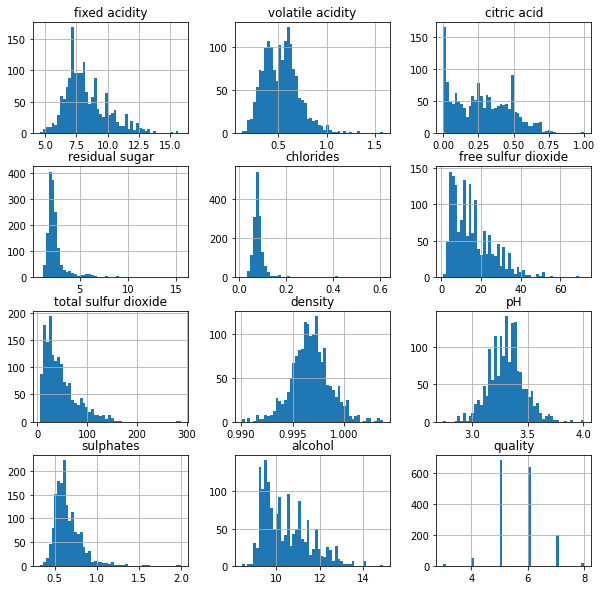

In [7]:
dataset.hist(figsize=(10,10),bins=50)
plt.show()

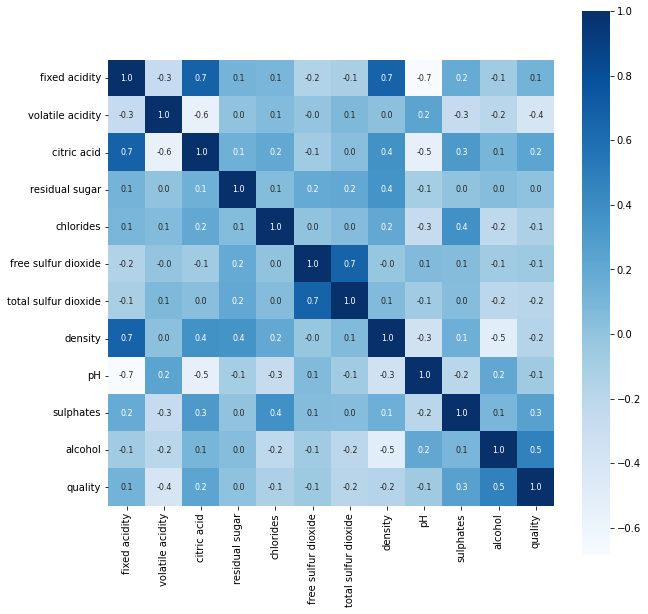

In [8]:
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [9]:
dataset.quality.unique()

array([5, 6, 7, 4, 8, 3])

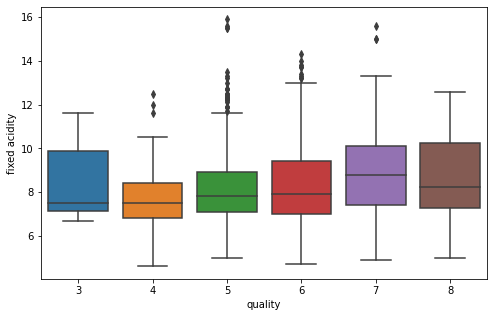

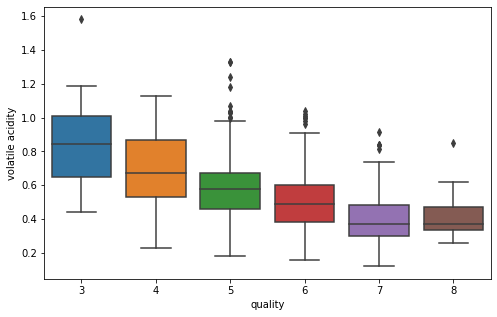

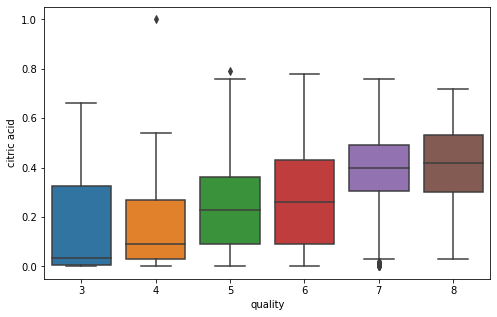

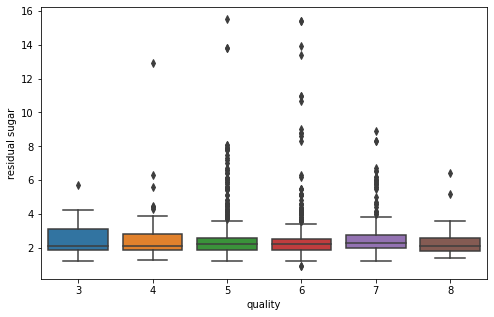

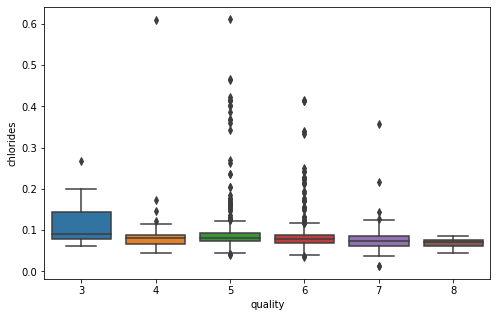

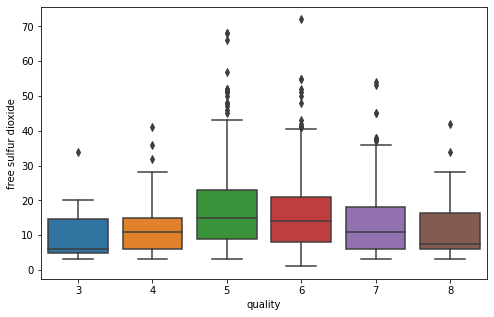

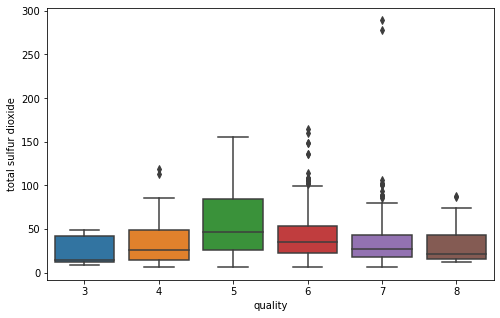

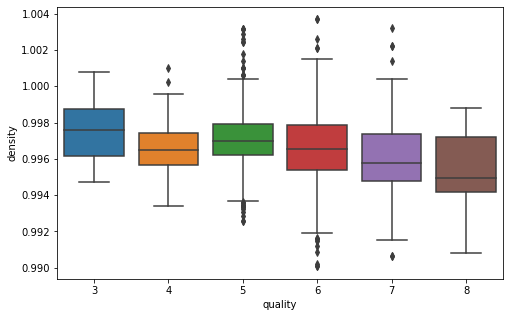

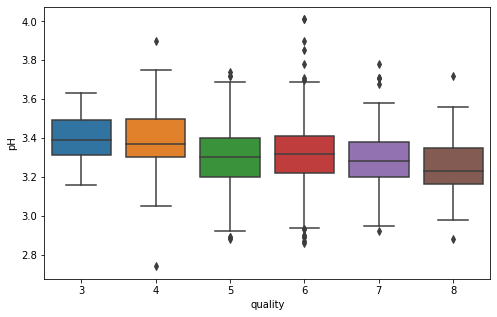

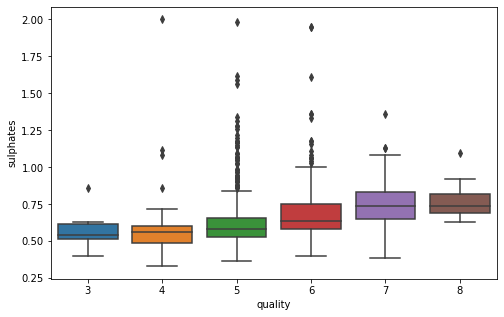

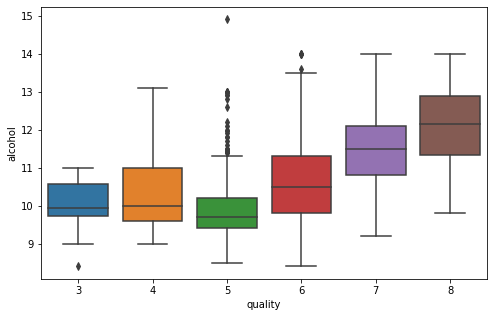

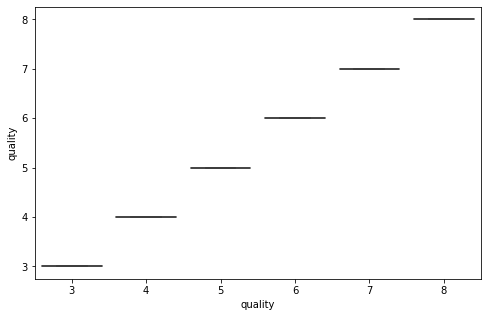

In [10]:
cols = dataset.columns
cnt =1 
for col in cols:
  plt.figure(figsize=(8,5))
  sns.boxplot(x='quality',y=col,data=dataset)
  cnt = cnt + 1
plt.show()


In [11]:
correlations = dataset.corr()['quality'].drop('quality')
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [12]:
features = get_features(0.05)
print(features)
x = dataset[features]
y = dataset['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [13]:
y = y.map({3 : '0', 4:'0', 5: '0', 6: '0', 7: '1', 8: '1'})

In [14]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 10)
(1199,)
(400, 10)
(400,)


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(n_estimators = 200,random_state=5)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("Random forest model score : ", np.abs(score)*100)

Random forest model score :  91.0


Test Case

In [19]:
input_data = x[5:6]
input_data_arr= np.asarray(input_data)
input_data_arr_reshape = input_data_arr.reshape(1, -1)
print(input_data)

   fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
5            7.4              0.66          0.0  ...  3.51       0.56      9.4

[1 rows x 10 columns]


In [20]:
input_scaler = sc.transform(input_data_arr_reshape)
prediction = model.predict(input_scaler)
print(prediction)
if(prediction[0] == '0'):
    print("Quality of wine is poor")
else:
    print("Quality of wine is good")

['0']
Quality of wine is poor


In [21]:
print(y[5:6])

5    0
Name: quality, dtype: object
